# 機器學習概要

機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

照例是讀入我們的標準套件。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 用 SVM 來做分類

#### 先做個簡單的資料

假設我們有四個點, 有兩個類別。

In [2]:
x = np.array([[-3, 2], [-6,5], [3,-4], [2, -8]])
y = np.array([1, 1, 2, 2])

我們要畫圖時, 需要把 $x$ 中點的 $x$-座標, $y$-座標分成兩個 list (array)。記得我們要 $x$ 全部是這樣叫出來的。

In [3]:
x[:]

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

而 $x$ 中前面的元素 ($x$-座標) 是這樣。當然 $y$-座標也是類似方法叫出來。

In [4]:
x[:,0]

array([-3, -6,  3,  2])

於是我們就能畫圖, `s=50` 是設定點的大小, `c=y` 就是指定顏色, 不同類別不同色。

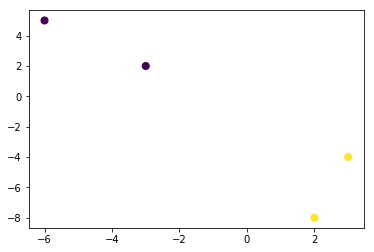

In [5]:
plt.scatter(x[:,0], x[:,1], s=50, c=y);

#### SVM 支持向量機

支持向量機, 大家都用英文縮寫 SVM 稱呼。是一個用曲線把資料分隔的辦法。在高維度的時候自然就是曲面 (超曲面) 分隔資料的方法。

In [6]:
from sklearn.svm import SVC

打開一台機器 (這以後我們常常會做類似的動作)。

In [7]:
clf = SVC()

學習! 這樣就做完了!!

In [8]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 1.3 預測結果

先來看看我們之前用來學的有沒有做對。

In [9]:
clf.predict([[-0.8,-1]])

array([1])

再來視覺化一下我們的成果。

In [10]:
gd = np.array([[i,j] for i in np.arange(-8, 4, 0.6) 
 for j in np.arange(-10, 6, 0.8)])

In [11]:
gdc = clf.predict(gd)

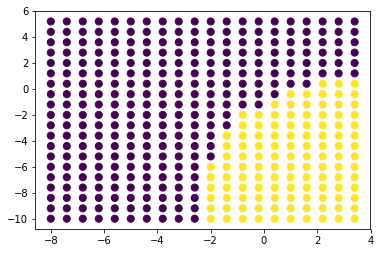

In [12]:
plt.scatter(gd[:,0], gd[:,1], s=50, c=gdc)

## 2. 生個「像樣點」的假數據

剛剛我們隨便做的數據又少、又不像真的。不如我們就來用 `sklearn` 生一些「像真的一樣」的數據。

#### 用 `make_classification` 製造分類數據

In [13]:
from sklearn.datasets import make_classification

開始你只需知道, `n_features` 是指 $x$ 的參數要幾個, `n_classes` 是你要分成幾類。

In [14]:
x, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, 
                           n_clusters_per_class=1, n_classes=3)

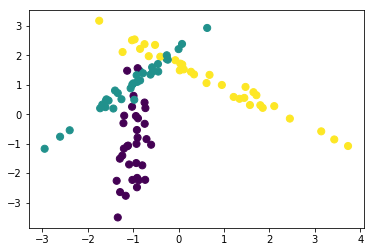

In [15]:
plt.scatter(x[:,0], x[:,1], s=50, c=y)

#### 訓練方式其實是一樣的!

In [17]:
clf = SVC()

In [18]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 來看預測的結果

這裡看看我們可愛的 SVM, 把我們訓練資料學得怎麼樣。

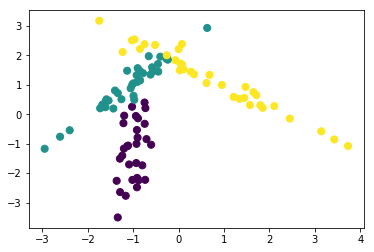

In [19]:
plt.scatter(x[:,0], x[:,1], s=50, c=clf.predict(x))

你有沒有看出哪個分錯了? 我是看不出來。所以我們用個簡單方式, 如果沒錯的會用一個顏色, 錯了就用其他顏色表示。

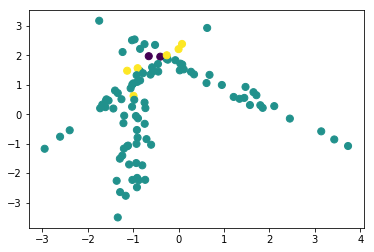

In [20]:
plt.scatter(x[:,0], x[:,1], s=50, c=clf.predict(x) - y)

當然再畫個我們最愛的...

In [21]:
gd = np.array([[i,j] for i in np.arange(-4, 4, 0.4) 
 for j in np.arange(-3, 4, 0.4)])

In [22]:
gdc = clf.predict(gd)

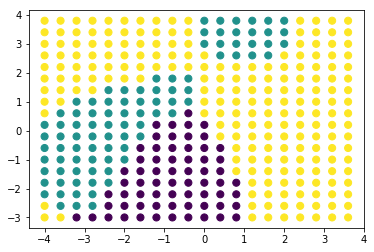

In [23]:
plt.scatter(gd[:,0], gd[:,1], s=50, c=gdc)

## 3. K-Means 會自動分類!

我們介紹一個很好用的 unsupervised learning, 叫 K-Means。我們可以指定把我們資料分成幾類, 然後它就會快速分好!

#### 隨便生個 100 點

In [24]:
x = np.random.rand(100,2)

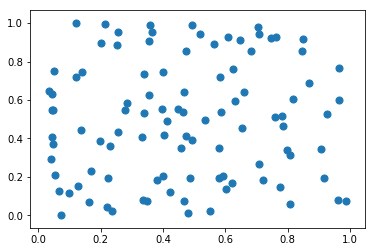

In [25]:
plt.scatter(x[:,0], x[:,1], s=50)

#### 製做一個 K-Means 分類器

和前面 SVM 很像。

In [26]:
from sklearn.cluster import KMeans

記得要告訴 K-Means 要分成幾類 (我們這裡是 3 類)。

In [27]:
clf = KMeans(n_clusters=3)

In [28]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### 訓練好的結果

訓練好的結果, 在神秘的 `labels_` 之下。

In [29]:
clf.labels_

array([1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1,
       0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2,
       1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 2, 1], dtype=int32)

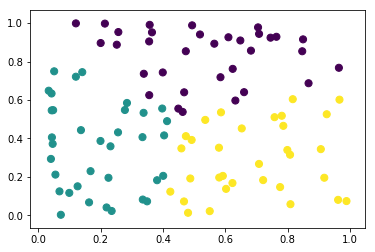

In [30]:
plt.scatter(x[:,0], x[:,1], s=50, c=clf.labels_)

#### 畫完整分類

和以前一樣, 未來新的資料進來, 我們訓練好的也可以再做分類。

In [31]:
gd = np.array([[i,j] for i in np.arange(-4, 4, 0.4) 
 for j in np.arange(-3, 3, 0.4)])

In [32]:
gdc = clf.predict(gd)

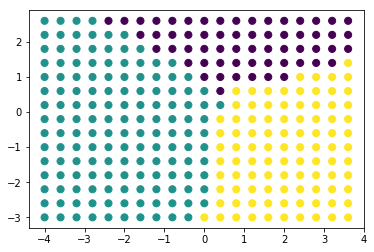

In [33]:
plt.scatter(gd[:,0], gd[:,1], s=50, c=gdc)